# TP Modèles Markoviens 




In [ ]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

## Part 1
Programmation de l'échantillonneur de Gibbs et tirage d'échantillons de modèles markoviens 

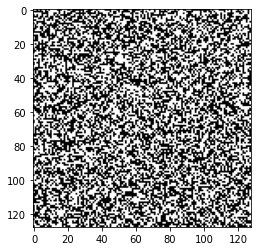

In [ ]:
plt.set_cmap('gray')
 
sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Fonction echan
Compléter la fonction suivante qui prend en entrée une image binaire qui sera mise à jour par échantillonnage de Gibbs et la valeur du paramètre de régularisation 

In [ ]:
1 / ( 1 + math.exp(-2 * -2 ))

0.01798620996209156

In [ ]:
math.exp(-2 * -2) / (1 + math.exp(-2  * -2))

0.9820137900379085

In [ ]:
def echan(im_bin,beta_reg):
    i=0;
    j=0;

    for i in range(im_bin.shape[0]):  
        for j in range(im_bin.shape[1]):
          #ne pas modifier ces indices 
          #ils permettent d'accéder aux pixels voisins 
          # i1,j et i2,j et i,j1 et i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # compléter le calcul des énergies et proba assosiées 
        # énergie et proba non normalisée lorsque le pixel est mis dans la classe 0
            Ureg0=(im_bin[i1,j]  + im_bin[i2,j] + im_bin[i,j1] + im_bin[i1,j2])*beta_reg
            p0=math.exp(-Ureg0);

        # énergie et proba non normalisée lorsque le pixel est mis dans la classe 1
            Ureg1=np.abs(im_bin[i1,j]-1  + im_bin[i2,j]-1 + im_bin[i,j1]-1 + im_bin[i1,j2]-1)*beta_reg
            p1=math.exp(-Ureg1);

        #tirage selon les probabilités normalisées NB la normalisation est effectuée ici
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

En faisant varier la valeur du paramètre de régularisation et en relançant la cellule, observez. Vous pouvez enlever la visualisation en cours d'échantillonnage et augmenter le nombre d'itérations. 


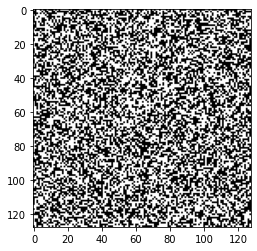

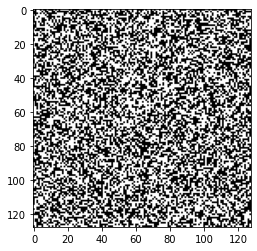

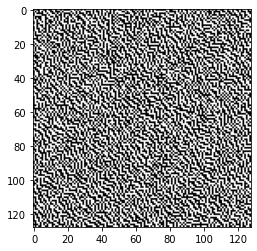

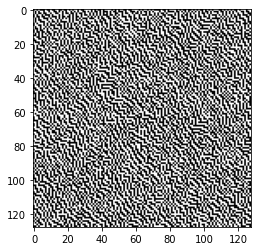

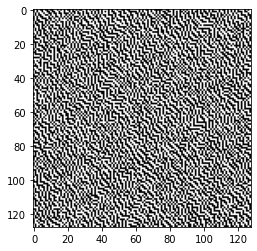

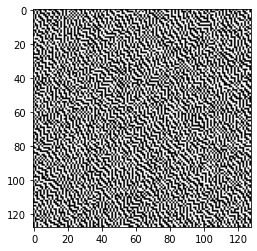

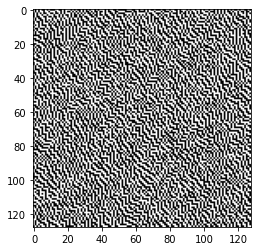

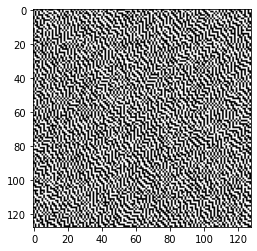

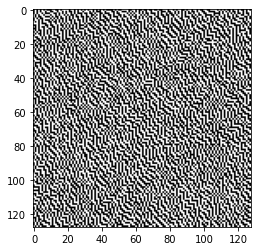

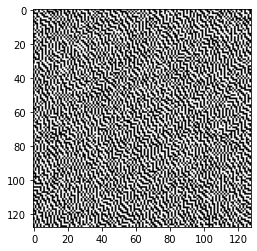

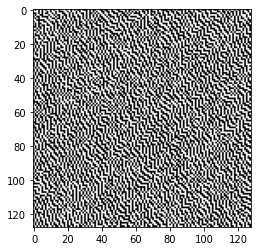

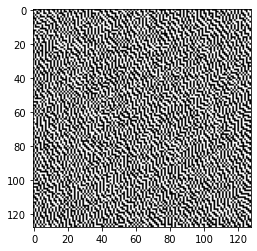

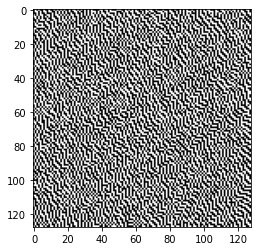

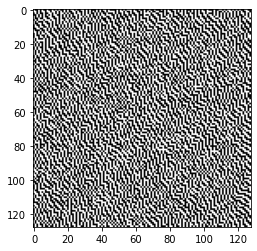

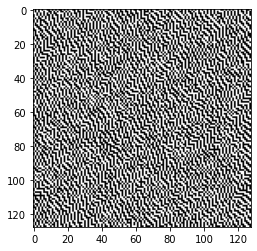

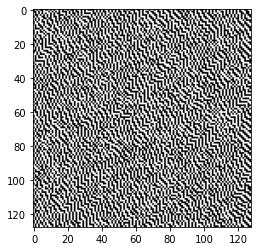

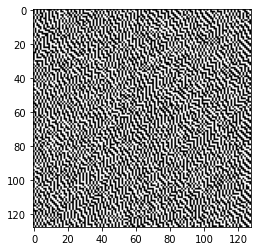

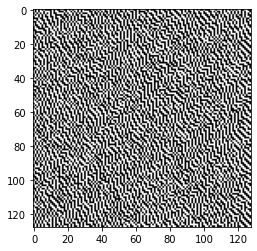

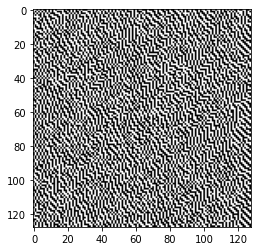

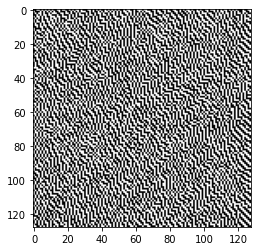

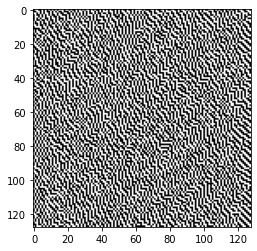

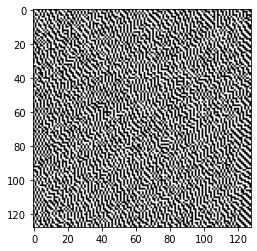

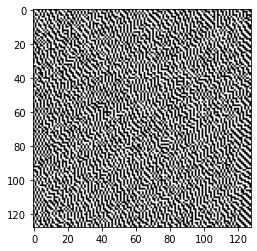

In [ ]:
#initialisation aléatoire de im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg = -5.5

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

for n in range(20):  
    echan(im_bin,beta_reg) 
    plt.imshow(im_bin)      
    mafigure.canvas.draw()
    plt.show(block=False)
    

plt.figure()
plt.imshow(im_bin)
plt.show()

## Part 2 Classification bayésienne binaire d'une image 
Importer les images manuellement dans le répertoire de travail (cliquer sur l'icône à gauche représentant un répertoire, puis sur importer et sélectionner les images à importer). L'image Iobservee.png est l'image qui a été acquise par le capteur et qui est la réalisation du champ des observatons (notée y dans le cours). L'image IorginaleBW.png est l'image des deux classes "parfaite" (notée réalisation x du champ des labels X dans le cours) qui va être ensuite observée par le capteur pour donner y. L'objectif de cette seconde partie est d'estimer x à partir de y en utilisant un a priori sur P(X) sous forme d'un modèle Markovien. 

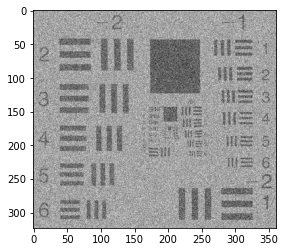

In [ ]:
im_obs=imageio.imread('Iobservee.png')

plt.figure()
plt.imshow(im_obs)

plt.set_cmap('gray')

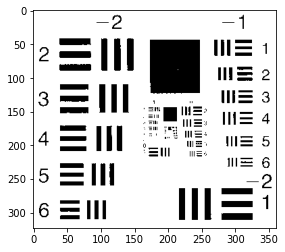

In [ ]:
im_ori=imageio.imread('IoriginaleBW.png')

plt.figure()
plt.imshow(im_ori)
plt.set_cmap('gray')
plt.show()

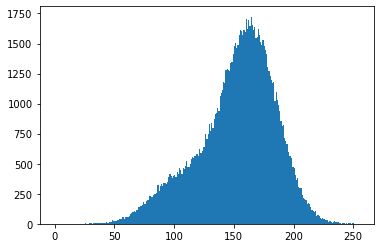

In [ ]:

#etude des distributions des deux classes 
#affichage de l'histogramme de l'image 
plt.figure()
plt.hist(im_obs.ravel(),range=[0,np.max(im_obs)],bins=np.max(im_obs))
plt.show()

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.,  0.,  1.,  2.,  0.,  1.,  3.,  0.,  0.,  1.,  0.,  0.,
         2.,  1.,  2.,  2.,  4.,  3.,  2.,  1.,  5.,  3.,  3.,  4.,  8.,
         8.,  8., 13.,  9., 17., 13.,  6., 12., 15., 10., 16., 11., 21.,
        25., 17., 22., 27., 14., 31., 30., 27., 44., 25., 30., 37., 38.,
        30., 41., 40., 49., 35., 30., 38., 43., 43., 48., 51., 49., 41.,
        44., 54., 43., 36., 65., 50., 47., 42., 48., 34., 45., 48., 44.,
        55., 53., 41., 47., 37., 42., 50., 37., 30., 39., 35., 21., 36.,
        40., 24., 30., 34., 20., 29., 26., 11., 14., 24., 25., 24., 18.,
        21., 17., 11.,  9.,  9., 17., 16.,  6.,  8., 12.,  6.,  7.,  2.,
         9.,  6.,  4.,  3.,  6.,  6.,  3.,  2.,  0.,  3.,  5.,  0.,  2.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,

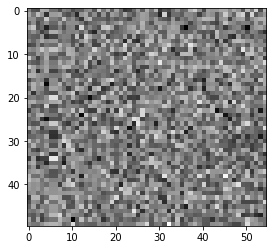

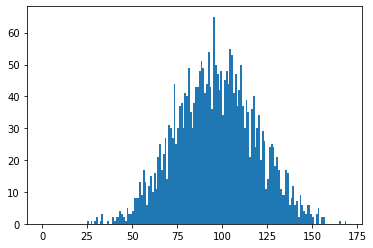

In [ ]:
#selectionner une imagette dans une région sombre de l'image (classe 0)
#attention les ordonnées correspondent aux lignes et les abscisses aux colonnes
crop_classe0=im_obs[50:100, 175:230]
#visualiser l'imagette
plt.imshow(crop_classe0)
#tracer son histogramme
plt.figure()
plt.hist(crop_classe0.ravel(),range=[0,np.max(crop_classe0)],bins=np.max(crop_classe0))

In [ ]:
#calculer sa moyenne et sa variance
#
#  Par défaut, np.mean, np.zzz prend les deux axes de l'image. 
#   Il faut forcer l'option si l'on veut faire la moyenne en ligne ou en colonne
# utiliser np.mean et np.var
m0= np.mean(crop_classe0)
var0= np.var(crop_classe0)

print(m0)
print(var0)

96.13490909090909
495.36398135537195


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  2.,  0.,  1.,  3.,  2.,  3.,  1.,  5.,  7.,  4.,  8.,
         7.,  3.,  5.,  5., 15., 10.,  8., 11., 12., 18., 14., 12., 12.,
        11., 16., 11., 28., 18., 24., 20., 22., 19., 26., 29., 22., 24.,
        27., 32., 32., 34., 34., 30., 35., 38., 33., 26., 32., 37., 41.,
        41., 38., 53., 44., 55., 41., 47., 35., 46., 53., 42., 44., 52.,
        40., 40., 43., 24., 44., 27., 44., 29., 35.

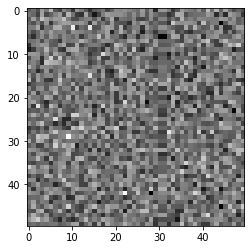

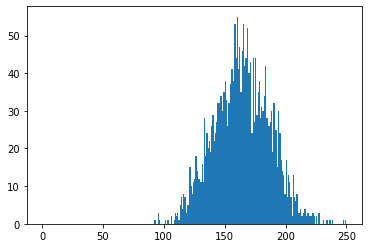

In [ ]:
#sélectionner une imagette dans une région claire de l'image (classe 1)
crop_classe1=im_obs[250:300, 150:200]
#tracer son histogramme
plt.imshow(crop_classe1)
plt.figure()
plt.hist(crop_classe1.ravel(),range=[0,np.max(crop_classe1)],bins=np.max(crop_classe1))

In [ ]:
#calculer sa moyenne et sa variance 
m1 = np.mean(crop_classe1)
var1 = np.var(crop_classe1)

print(m1)
print(var1)

163.9012
524.9562385600001


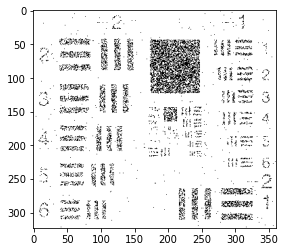

In [ ]:
#definir le seuil pour faire une classification au sens du MV
seuil=100
im_bin=im_obs.copy()
im_mask=im_obs>seuil
im_bin[~im_mask]=0
im_bin[im_mask]=1
#im_bin servira d'initialisation pour l'ICM

im_seuil=im_bin.copy()
plt.figure()
plt.imshow(im_seuil);      

### Fonction ICM 
En vous aidant de ce que vous avez fait pour l'échantillonneur de Gibbs compléter la fonction suivante pour faire une itération de l'algorithme des Modes Conditionnels Itérés (un passage sur tous les pixels de l'image). 

In [ ]:
def iter_icm(im_bin,im_toclass,beta_reg,m0,m1):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            #ne pas changer le calcul des indices qui permet d'accéder aux voisins
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

            #calcul de l'énergie si le pixel est mis dans la classe 0
            Ureg0=beta_reg*(im_bin[i, j1]+im_bin[i, j2]+im_bin[i1, j]+im_bin[i2, j])
            Uattdo0=(im_toclass[i, j]-m0)**2;
            U0=Uattdo0+Ureg0;
            #p0=math.exp();

            #calcul de l'énergie si le pixel est mis dans la classe 1
            Ureg1=beta_reg*(4-(im_bin[i, j1]+im_bin[i, j2]+im_bin[i1, j]+im_bin[i2, j]))
            Uattdo1=(im_toclass[i, j]-m1)**2;
            U1=Uattdo1+Ureg1;
            #p1=math.exp();

            if (U0<U1):
                im_bin[i,j]= 0
            else :
                im_bin[i,j]= 1

    return im_bin


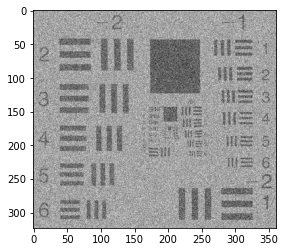

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in ubyte_scalars


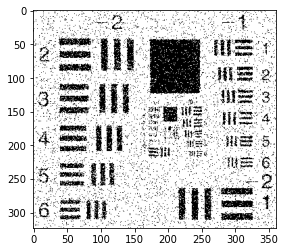

In [ ]:

#definir la valeur de beta_reg pour avoir une "bonne" regularisation
beta_reg=100
im_bin = im_obs.copy()
mafigure=plt.figure()
plt.imshow(im_bin);        
plt.show()
for n in range(30):  
    im_bin = iter_icm(im_bin,im_obs,beta_reg,m0,m1) 
    #plt.imshow(im_bin);        
    #plt.show(block=False)

plt.figure()
plt.imshow(im_bin);
plt.show()

Vous pouvez comparer votre résultat avec l'image originale notamment pour trouver le bon paramètre de régularisation. 

In [ ]:
(((105-163)**2) / (2 * 500**2)) + np.log10(np.sqrt(2*np.pi*500))


1.755302936347067

In [ ]:
#utiliser np.abs pour calculer la valeur absolue de la différence 
#entre l'image riginale binaire et le résultat de l'ICM
# attention im_bin est codée 0 et 1 et im_ori 0 et 255
from numpy import linalg as LA
im_obs=imageio.imread('Iobservee.png')
im_ori=imageio.imread('IoriginaleBW.png')
#definir la valeur de beta_reg pour avoir une "bonne" regularisation
beta_reg=1

mafigure=plt.figure()
min_norm = 999999999
im_obs=imageio.imread('Iobservee.png')
im_ori=imageio.imread('IoriginaleBW.png')



best_image = []
listing = np.arange(0.1, 10.0, 0.1)
for beta_reg in listing:
  print(str((np.where(listing==beta_reg)[0][0])/listing.shape[0]*100)+"% done")
  im_bin = im_obs.copy()
  for n in range(10):
    im_bin = iter_icm(im_bin,im_obs,beta_reg,m0,m1) 
  ima_diff=np.abs(255*im_bin-im_ori)
  norm = LA.norm(ima_diff)
  print("norm ="+str(norm))
  if norm<min_norm:
    print("New best norm = "+str(norm)+" | beta = "+str(beta_reg))
    min_norm = norm
    best_image = ex

plt.figure()
plt.imshow(best_image);
plt.show()


ima_diff=np.abs(255*best_image-im_ori)
plt.figure()
plt.imshow(ima_diff);
plt.show()

0.0% done


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in ubyte_scalars


norm =14730.781208069042
New best norm = 14730.781208069042 | beta = 0.1
1.0101010101010102% done
norm =14730.781208069042
2.0202020202020203% done
norm =14730.781208069042
3.0303030303030303% done
norm =14730.781208069042
4.040404040404041% done
norm =14730.781208069042
5.05050505050505% done


KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

### Recuit simulé
Programmer la fonction recuit_r du recuit simulé qui permet de faire une mise à jour d'une image en échantillonnant avec la distribution de Gibbs a posteriori avec une température T fixée.  

In [ ]:
def echan_r(im_bin,im_toclass,beta_reg,m0,m1,T):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):

            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

            Ureg0= beta_reg * (im_bin[i, j1]+im_bin[i, j2]+im_bin[i1, j]+im_bin[i2, j])
            Uattdo0= (im_toclass[i,j]-m0)**2
            U0=Ureg0+Uattdo0

            p0=math.exp(-U0/T);

            Ureg1= beta_reg * ( 4 - ((im_bin[i, j1]+im_bin[i, j2]+im_bin[i1, j]+im_bin[i2, j])))
            Uattdo1=(im_toclass[i,j]-m1)**2
            U1=Ureg1+Uattdo1
            p1=math.exp(-U1/T);

            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin


Appeler itérativement la fonction recuit_r en faisant décroitre la température après chaque mise à jour suffisamment lentement. 

In [ ]:
#initialisation de la température 
im_obs=imageio.imread('Iobservee.png')
im_ori=imageio.imread('IoriginaleBW.png')
im_bin = im_obs.copy()
T=100
for n in range(10):
    print(n)
    echan_r(im_bin,im_obs,beta_reg,m0,m1,T)
    #mise à jour de la température 
    T = 0.99*T
    plt.imshow(im_bin);
    plt.show(block=False)

plt.figure()
plt.imshow(im_bin);
plt.show()

Faites une comparaison entre les résultats obtenus par l'algorithme des Modes conditionnels itérés et par le recuit simulé. 

